# Part 1: Wrangling 
data here: https://docs.google.com/spreadsheets/d/e/2PACX-1vRzR7Fe0ywUEippTZiJgVnxWKnvlOO3L1WaAdNxywLduz4WZx3-0Wje59qhQucVJyHYCCrHqWK4eA6W/pubhtml

Zack Greinke is one of the best starting pitchers in the MLB. He has been a perennial All-Star for the last 14 seasons and still managed to put up 3 of hist best campaigns in the last three years (the last three seasons are significant in terms of baseball statistics because 2015 was the first season that MLB's movement tracking system, Statcast, was officially brought online in all 30 MLB stadiums).

While Greinke is known for being a stud in general, he is also recognized for being very calculated and strategic in his pitch selection and approach to batters. This is why he is an intriguing subject for attempting to predict his pitch selection based off situational factors. An example of this, which is actually the basis for the presence of the variable $pk_coors$ (a dummy variable to indicate whether the game was held at coors field in Denver, significant to players because of Denver's elevation), is an article (https://www.fangraphs.com/tht/king-of-the-mountain-how-zack-greinke-took-control-in-coors-field/) highlighting how Greinke resorted to just 2 of his 5 pitches for the majority of his 5/5/17 start in Denver.

The features I am choosing to look at are as follows (Each variable is binary): 

**outcome of prior pitch:**

'prior_ball', 'prior_foul_bunt', 'prior_foul_tip', 'prior_hit_by_pitch', 'prior_hit_into_play', <br>
'prior_hit_into_play_no_out', 'prior_hit_into_play_score', 'prior_intent_ball',<br>
'prior_missed_bunt', 'prior_swinging_strike', 'prior_swinging_strike_blocked'

**coors field dummy**<br>

'pk_coors'<br>

**presence of runners on each base**<br>

'on_3b','on_2b','on_1b'

**number of outs before pitch**<br>

'outs_0','outs_1','outs_2'<br>

**batter stance**<br>

'stand_L','stand_R',<br>

**number of strikes to batter**<br>

'strike_0','strike_1','strike_2',

**number of balls to batter**<br>

'ball_0','ball_1','ball_2','ball_3',<br>

**times the batter has faced the pitcher this game**<br>

'times_faced_0','times_faced_1','times_faced_2','times_faced_3',<br>

**number of pitches in the plate appearance**<br>

'pcount_1', 'pcount_2', 'pcount_3', 'pcount_4', 'pcount_5', 'pcount_6', 'pcount_7',<br>
'pcount_8', 'pcount_9', 'pcount_10', 'pcount_11', 'pcount_12', 'pcount_13' <br>

The usage percentage across 8,899 pitches from 2015 to 2017 are as follows:

In [12]:
pd.DataFrame({'Type':['Fastball (FB)', 'Changeup (CH)', 'Curveball (CU)', 'Slider (SL)'],
                 '%':[0.5076975,0.1719294,0.1075402,0.2084504]})

,%,Type
0,0.507698,Fastball (FB)
1,0.171929,Changeup (CH)
2,0.107540,Curveball (CU)
3,0.208450,Slider (SL)


Since the majority of the time a fastball is thrown, the bar for the accuracy we want to achieve with this model is to be set at 50.8% because we want to be able to do better than just predicting that every pitch will be a fastball. 

In [13]:
import pandas as pd
pitcher = pd.read_csv('~\Documents\greinke_15_16_17.csv') 
pd.set_option('display.max_columns', None)

In [14]:
pitcher.head(100)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,pos2_person_id,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pos1_person_id,pos2_person_id.1,pos3_person_id,pos4_person_id,pos5_person_id,pos6_person_id,pos7_person_id,pos8_person_id,pos9_person_id,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number
0,CU,2017-09-29,75.1,-1.2453,6.1816,Zack Greinke,460077,425844,walk,ball,NaN,NaN,NaN,NaN,11.0,Drew Butera walks. Alex Gordon to 2nd.,R,R,R,KC,ARI,B,NaN,NaN,3,2,2017,0.7533,-0.8653,-0.2008,3.5006,NaN,NaN,460086.0,0,5,Bot,NaN,NaN,NaN,NaN,455104.0,NaN,170930_014904,0.8537,-109.1720,3.0653,5.7709,19.2742,-39.7569,3.1919,1.4415,NaN,NaN,NaN,74.448,2653.0,5.864,492484,425844.0,455104.0,502671.0,518614.0,571875.0,606466.0,444482.0,572041.0,502110.0,54.6346,0.000,0.000,0.7,1.0,0.0,0.0,NaN,37,8
1,FT,2017-09-29,90.5,-1.4121,6.1906,Zack Greinke,460077,425844,NaN,foul,NaN,NaN,NaN,NaN,2.0,NaN,R,R,R,KC,ARI,S,NaN,NaN,3,2,2017,-0.5887,1.1929,-0.2756,2.7266,NaN,NaN,460086.0,0,5,Bot,NaN,NaN,NaN,NaN,455104.0,NaN,170930_014838,4.0701,-131.6799,-5.3070,-7.6263,23.6678,-17.4367,3.0164,1.1984,194.0,74.4,58.2616,90.945,2436.0,6.216,492484,425844.0,455104.0,502671.0,518614.0,571875.0,606466.0,444482.0,572041.0,502110.0,54.2823,0.000,0.000,NaN,NaN,NaN,NaN,3.0,37,7
2,SL,2017-09-29,83.1,-1.2584,6.3212,Zack Greinke,460077,425844,NaN,foul,NaN,NaN,NaN,NaN,5.0,NaN,R,R,R,KC,ARI,S,NaN,NaN,3,2,2017,0.1702,-0.0027,0.1623,1.9487,NaN,NaN,460086.0,0,5,Bot,NaN,NaN,NaN,NaN,455104.0,NaN,170930_014802,2.8869,-120.7882,-3.5708,1.1389,20.6162,-31.8165,3.0164,1.1984,14.0,84.9,-7.8704,82.245,2742.0,5.497,492484,425844.0,455104.0,502671.0,518614.0,571875.0,606466.0,444482.0,572041.0,502110.0,55.0019,0.000,0.000,NaN,NaN,NaN,NaN,2.0,37,6
3,CH,2017-09-29,87.3,-1.4310,6.1788,Zack Greinke,460077,425844,NaN,ball,NaN,NaN,NaN,NaN,13.0,NaN,R,R,R,KC,ARI,B,NaN,NaN,2,2,2017,-1.4207,0.0300,-0.8905,1.7247,NaN,NaN,460086.0,0,5,Bot,NaN,NaN,NaN,NaN,455104.0,NaN,170930_014734,4.2051,-127.1573,-4.7591,-16.3041,21.2726,-31.2253,3.2412,1.6018,NaN,NaN,NaN,88.077,1632.0,6.312,492484,425844.0,455104.0,502671.0,518614.0,571875.0,606466.0,444482.0,572041.0,502110.0,54.1868,0.000,0.000,NaN,NaN,NaN,NaN,NaN,37,5
4,CU,2017-09-29,73.8,-1.2964,6.3091,Zack Greinke,460077,425844,NaN,blocked_ball,NaN,NaN,NaN,NaN,14.0,NaN,R,R,R,KC,ARI,B,NaN,NaN,1,2,2017,0.6170,-1.2857,0.3098,0.6580,NaN,NaN,460086.0,0,5,Bot,NaN,NaN,NaN,NaN,455104.0,NaN,170930_014703,2.1961,-107.2310,-1.9838,4.1953,19.7199,-41.6681,3.2042,1.5648,NaN,NaN,NaN,72.458,2775.0,5.491,492484,425844.0,455104.0,502671.0,518614.0,571875.0,606466.0,444482.0,572041.0,502110.0,55.0077,0.000,0.000,NaN,NaN,NaN,NaN,NaN,37,4
5,SL,2017-09-29,82.6,-1.1387,6.3869,Zack Greinke,460077,425844,NaN,called_strike,NaN,NaN,NaN,NaN,9.0,NaN,R,R,R,KC,ARI,S,NaN,NaN,1,1,2017,0.0123,0.0124,0.5156,1.8912,NaN,NaN,460086.0,0,5,Bot,NaN,NaN,NaN,NaN,455104.0,NaN,170930_014636,3.6879,-120.0381,-3.7620,-0.5306,21.0541,-31.6276,3.2450,1.5213,NaN,NaN,NaN,81.739,NaN,5.564,492484,425844.0,455104.0,502671.0,518614.0,571875.0,606466.0,444482.0,572041.0,502110.0,54.9341,0.000,0.000,NaN,NaN,NaN,NaN,NaN,37,3
6,FF,2017-09-29,90.4,-1.1275,6.4596,Zack Greinke,460077,425844,NaN,foul,NaN,NaN,NaN,NaN,5.0,NaN,R,R,R,KC,ARI,S,NaN,NaN,1,0,2017,-0.4199,1.4117,0.0370,2.2746,NaN,NaN,460086.0,0,5,Bot,NaN,NaN,NaN,NaN,455104.0,NaN,170930_014601,3.8246,-131.3507,-7.5751,-5.7040,26.4449,-14.2476,3.0164,1.1984,NaN,NaN,NaN,91.098,2365.0,6.675,492484

In [15]:
pitcher = pitcher[['pitch_type','game_date','release_speed','plate_x','plate_z','pfx_x','pfx_z','zone',
                   'batter','stand','description','balls','strikes','on_3b','on_2b','on_1b','outs_when_up',
                   'inning','game_pk','at_bat_number','pitch_number']]

In [16]:
#table is backwards, this cell takes a long time, but will make things much easier later
import copy
temp =copy.deepcopy(pitcher)
j = len(pitcher) - 1
for i in range(len(pitcher)):
    pitcher.iloc[i] = temp.iloc[j]
    j -= 1

In [17]:
pitcher['times_faced'] = [0]*len(pitcher)

In [18]:
#create "times_thru_order" column
batters_faced = 0
game_date = pitcher['game_date'].loc[0]
batters = []

for i in range(len(pitcher)):
    if pitcher['game_date'].loc[i] != game_date:
        game_date = pitcher['game_date'].loc[i]
        batters_faced = 0
        batters = []
    else:
        if pitcher['pitch_number'].loc[i] == 1:
            batters_faced += 1
            batters.append(pitcher['batter'].loc[i])
        if pitcher['batter'].loc[i] in batters:
            pitcher['times_faced'].loc[i] = batters_faced / 9

C:\Python27\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [23]:
# modify on_1b, on_2b, on_3b to be binary variables 
for i in range(len(pitcher)):
    if pitcher['on_1b'].loc[i] == pitcher['on_1b'].loc[i]:
        pitcher['on_1b'].loc[i] = 1
    else:
        pitcher['on_1b'].loc[i] = 0
    if pitcher['on_2b'].loc[i] == pitcher['on_2b'].loc[i]:
        pitcher['on_2b'].loc[i] = 1
    else:
        pitcher['on_2b'].loc[i] = 0
    if pitcher['on_3b'].loc[i] == pitcher['on_3b'].loc[i]:
        pitcher['on_3b'].loc[i] = 1
    else:
        pitcher['on_3b'].loc[i] = 0

Since the decision tree will be binary, I will have to create a lot of dummy variables.

In [26]:
#create dummy variables for pitch types 
one_hot_pitch = pd.get_dummies(pitcher['pitch_type'],prefix = 'pitch',dummy_na=True)
pitcher = pitcher.join(one_hot_pitch)

In [27]:
#create dummy values variables for batter stance
one_hot_stand = pd.get_dummies(pitcher['stand'],prefix='stand')
pitcher = pitcher.join(one_hot_stand)

In [28]:
#dummy variable for strike count
one_hot_strike = pd.get_dummies(pitcher['strikes'],prefix = 'strike')
pitcher = pitcher.join(one_hot_strike)

In [29]:
#dummy variable for times faced
one_hot_tfaced = pd.get_dummies(pitcher['times_faced'],prefix = 'times_faced')
pitcher = pitcher.join(one_hot_tfaced)

In [30]:
#dummy variable for ball count
one_hot_ball = pd.get_dummies(pitcher['balls'],prefix = 'ball')
pitcher = pitcher.join(one_hot_ball)

In [31]:
#dummy for pitch count
one_hot_pcount = pd.get_dummies(pitcher['pitch_number'],prefix = 'pcount')
pitcher = pitcher.join(one_hot_pcount)

In [32]:
#dummy for outs when up
one_hot_outs = pd.get_dummies(pitcher['outs_when_up'],prefix = 'outs')
pitcher = pitcher.join(one_hot_outs)

It should seem logical that the event preceeding the plate-appearence will have an effect on the pitch selection. Consider if the last outcome was a hit and there are runners on base, this will amount to a more conservative approach by the pitcher for the next batter faces..

In [33]:
pitcher['prior_outcome'] = [None]*len(pitcher)

In [34]:
game_date = pitcher['game_date'].loc[0]
for i in range(1,len(pitcher)):
    if pitcher['game_date'].loc[i] == game_date:
        pitcher['prior_outcome'].loc[i] = pitcher['description'].loc[i - 1]
    else:
        game_date = pitcher['game_date'].loc[i]    

In [37]:
#create dummy values variables for what happened on the prior pitch
one_hot_outcome = pd.get_dummies(pitcher['prior_outcome'],prefix='prior',dummy_na=True)
pitcher = pitcher.join(one_hot_outcome)

Greinke has played in the NL West, the same division as the Colorado Rockies in 15',16', and 17', whicxh means that he played a significant amount of games at the high-elevation stadium. I want to include a dummy variable to see if there is any effect on the model.

In [38]:
#create dummy variable to show if game was held at coors field, a stadium in Denver, which is effected by elevation
pitcher['pk_coors'] = pitcher.apply(lambda row: 1 if row.game_pk == 414427 else 0, axis=1)

Technically Greinke throws 2 types of fastballs (well really *technically* three if you include the cutter), the fourseam and the twoseam. The twoseam fastball is very hard to differentiate from the fourseam so I will combine them into one category.

In [40]:
pitcher['pitch_FB'] = pitcher.apply(lambda row: 1 if row.pitch_FF == 1 or row.pitch_FT == 1 else 0, axis=1)

I will need a multinomial response variable for the pitch type.

In [42]:
pitcher['pitch'] = pitcher.apply(lambda row: 0 if row.pitch_FB == 1
                                             else 1 if row.pitch_CU == 1
                                             else 2 if row.pitch_CH == 1
                                             else 3, axis=1)

In [43]:
pitcher.head()

,pitch_type,game_date,release_speed,plate_x,plate_z,pfx_x,pfx_z,zone,batter,stand,description,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,inning,game_pk,at_bat_number,pitch_number,times_faced,pitch_CH,pitch_CU,pitch_EP,pitch_FF,pitch_FT,pitch_IN,pitch_SL,pitch_nan,stand_L,stand_R,strike_0,strike_1,strike_2,times_faced_0,times_faced_1,times_faced_2,times_faced_3,ball_0,ball_1,ball_2,ball_3,pcount_1,pcount_2,pcount_3,pcount_4,pcount_5,pcount_6,pcount_7,pcount_8,pcount_9,pcount_10,pcount_11,pcount_12,pcount_13,outs_0,outs_1,outs_2,prior_outcome,prior_ball,prior_blocked_ball,prior_called_strike,prior_foul,prior_foul_bunt,prior_foul_tip,prior_hit_by_pitch,prior_hit_into_play,prior_hit_into_play_no_out,prior_hit_into_play_score,prior_intent_ball,prior_missed_bunt,prior_swinging_strike,prior_swinging_strike_blocked,prior_nan,pk_coors,pitch_FB,pitch
0,FF,2015-04-07,90.6,0.493,3.312,-0.413900,1.538733,3.0,571976,R,foul,0,0,1.0,1.0,1.0,0,1,413668,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,FF,2015-04-07,92.7,0.557,2.570,-0.649092,1.617567,6.0,571976,R,called_strike,0,1,1.0,1.0,1.0,0,1,413668,1,2,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,foul,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,SL,2015-04-07,86.1,0.271,1.629,0.190083,0.035167,8.0,571976,R,foul,0,2,1.0,1.0,1.0,0,1,413668,1,3,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,called_strike,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
3,SL,2015-04-07,86.0,0.011,2.384,0.302808,0.188533,5.0,571976,R,foul,0,2,1.0,1.0,1.0,0,1,413668,1,4,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,foul,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3
4,SL,2015-04-07,87.0,0.714,0.736,0.358475,0.416433,14.0,571976,R,ball,0,2,1.0,1.0,1.0,0,1,413668,1,5,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,foul,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3


# Kmeans

A few of the pitches in the dataset are either missing a classification or are suspiciously classified, so I will attempt to identify some outliers based of relase speed and then re-classify them with K-means. I will include some feature in this Kmeans model that I won't be including in the decision tree model because while these variables are good for predicting the pitch type, they are not situational statistics and will not provide me any insights on the decision making behind the pitch selection. These features are more or less how we define pitch types to start with. The variables are 'release_speed', 'plate_x','plate_z','pfx_x','pfx_z', and zone. 'Plate_x' and 'Plate_z' are the x and z coordinates of the pitch when it crosses the plate and pfx_x and pfx_z are the release point coordinates. Zone is a metric that indicates which sector of the strike zone the pitch was in(see photo). 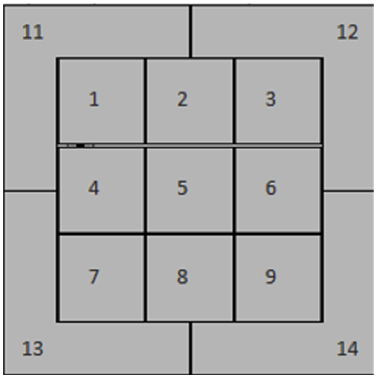

In [44]:
import os
home_path =  os.path.expanduser('~')
os.chdir(home_path + '\Documents\Github\datascience_1')
!git pull
import sys
sys.path.append(home_path + '\Documents\Github\datascience_1')
from week7 import *
%who function

Already up-to-date.
accuracy	 build_pred	 build_tree_iter	 caser	 closest_centroid	 compute_mean	 compute_prediction	 compute_training	 euclidean_distance	 
f1	 find_best_splitter	 forest_builder	 generate_table	 gig	 gini	 informedness	 initialize_centroids	 k_fold	 
k_means	 phase_1	 phase_2	 predictor_case	 probabilities	 row_to_vect	 seeder	 tree_predictor	 vote_taker	 



In [45]:
def compute_centroid_labels(centroids, focus_table, focus_column, features, k):
    
    mean_list = [[0,0]]
    for i in range(k - 1):
        mean_list.append([0,0]) #stores k tuples:(value accumulation, number of observations)
    
    for i in range(len(focus_table)):
        index = closest_centroid(centroids,row_to_vect(focus_table.iloc[i],features),k)[0]
        mean_list[index][0] += focus_table[focus_column].iloc[i]
        mean_list[index][1] += 1
    
    for i in range(len(centroids)):
        if mean_list[i][1] == 0:
            centroids[i]['mean_label'] = 0
        else:
            centroids[i]['mean_label'] = float(float(mean_list[i][0]) / float(mean_list[i][1]))
        
        
import numpy as np
def kmeans_fill(centroids, full_table, features, focus_column, k):
    full_table[focus_column+"kmeans"] = [0]*len(full_table)
    for i in range(len(full_table)):
        index = closest_centroid(centroids,row_to_vect(full_table.iloc[i],features),k)[0]
        full_table[focus_column+"kmeans"].iloc[i] = centroids[index]['mean_label']
               
                                          

In [46]:
features = ['release_speed','plate_x','plate_z','pfx_x','pfx_z','zone','prior_ball','prior_foul_bunt',
       'prior_foul_tip','prior_hit_by_pitch','prior_hit_into_play',
       'prior_hit_into_play_no_out', 'prior_hit_into_play_score',
       'prior_intent_ball', 'prior_missed_bunt', 'prior_swinging_strike',
       'prior_swinging_strike_blocked','pk_coors',
       'balls','strikes','on_3b','on_2b','on_1b','outs_when_up','stand_L','stand_R']
k = 10

These 6 data points are missing most of the data so they are garbage and I am going to throw them out

In [47]:
#Drop these rows. No pitch data was recorded
#181,183,
#pitcher[pitcher['pitch_type'].isnull()==True]
pitcher = pitcher.drop(pitcher.index[[5749,7074,7135,7511,8721,8723]])
pitcher = pitcher.reset_index(drop=True)

These are the three unclassified pitch types.

In [48]:
pitcher[pitcher['pitch_type'].isnull()==True]

,pitch_type,game_date,release_speed,plate_x,plate_z,pfx_x,pfx_z,zone,batter,stand,description,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,inning,game_pk,at_bat_number,pitch_number,times_faced,pitch_CH,pitch_CU,pitch_EP,pitch_FF,pitch_FT,pitch_IN,pitch_SL,pitch_nan,stand_L,stand_R,strike_0,strike_1,strike_2,times_faced_0,times_faced_1,times_faced_2,times_faced_3,ball_0,ball_1,ball_2,ball_3,pcount_1,pcount_2,pcount_3,pcount_4,pcount_5,pcount_6,pcount_7,pcount_8,pcount_9,pcount_10,pcount_11,pcount_12,pcount_13,outs_0,outs_1,outs_2,prior_outcome,prior_ball,prior_blocked_ball,prior_called_strike,prior_foul,prior_foul_bunt,prior_foul_tip,prior_hit_by_pitch,prior_hit_into_play,prior_hit_into_play_no_out,prior_hit_into_play_score,prior_intent_ball,prior_missed_bunt,prior_swinging_strike,prior_swinging_strike_blocked,prior_nan,pk_coors,pitch_FB,pitch
369,NaN,2015-04-24,87.9,-0.9057,2.4075,-1.5457,0.9918,13.0,571976,R,foul_bunt,0,0,1.0,1.0,1.0,0,5,413891,38,1,2,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,hit_into_play,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3
393,NaN,2015-04-24,90.1,-0.2929,2.5727,-0.8864,1.6402,4.0,519025,R,foul,0,0,1.0,1.0,1.0,0,7,413891,52,1,2,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,called_strike,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
733,NaN,2015-05-16,92.3,-0.9475,2.4554,-0.2815,1.6456,13.0,572816,L,foul,3,2,1.0,1.0,1.0,0,2,414196,9,7,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,foul,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3


Now we find the centroids for each pitch type and compute the labels for each data point for each pitch type.

In [49]:
centroids = k_means(pitcher, features, k, {'n':100, 'threshold':0.0})

starting 1
starting 2
starting 3
starting 4
starting 5
starting 6
starting 7
starting 8
starting 9
starting 10
starting 11
starting 12
starting 13
starting 14
starting 15
starting 16
starting 17
starting 18
starting 19
starting 20
starting 21
starting 22
starting 23
starting 24
starting 25
starting 26
starting 27
starting 28
starting 29
starting 30
starting 31
starting 32
starting 33
starting 34
starting 35
done


In [50]:
compute_centroid_labels(centroids, pitcher, 'pitch_CU', features, k)
kmeans_fill(centroids, pitcher, features, 'pitch_CU', k)

In [51]:
compute_centroid_labels(centroids, pitcher, 'pitch_CH', features, k)
kmeans_fill(centroids, pitcher, features, 'pitch_CH', k)

In [52]:
compute_centroid_labels(centroids, pitcher, 'pitch_SL', features, k)
kmeans_fill(centroids, pitcher, features, 'pitch_SL', k)

In [53]:
compute_centroid_labels(centroids, pitcher, 'pitch_FF', features, k)
kmeans_fill(centroids, pitcher, features, 'pitch_FF', k)

In [54]:
compute_centroid_labels(centroids, pitcher, 'pitch_FT', features, k)
kmeans_fill(centroids, pitcher, features, 'pitch_FT', k)

In [55]:
compute_centroid_labels(centroids, pitcher, 'pitch_FB', features, k)
kmeans_fill(centroids, pitcher, features, 'pitch_FB', k)

## Find outliers based off release speed and replace with k-means

In [56]:
fastball = pitcher[pitcher['pitch_FB'] == 1]
slider = pitcher[pitcher['pitch_SL'] == 1]
changeup = pitcher[pitcher['pitch_CH'] == 1]
curve = pitcher[pitcher['pitch_CU'] == 1]
tables = [fastball,slider,changeup,curve] 
types = ['pitch_FB','pitch_SL','pitch_CH','pitch_CU']

In [57]:
def get_outliers(table):
        sigma3_speed = table['release_speed'].std() * 3
        mean_speed = table['release_speed'].mean()
        low_speed = mean_speed - sigma3_speed
        high_speed = mean_speed + sigma3_speed
        high_set = table[table['release_speed'] > high_speed].index.values
        low_set = table[table['release_speed'] < low_speed].index.values
        out_set = list(high_set) + list(low_set)
        print out_set

    # There are 6 missclassified sliders, 10 changeups, 2 twoseams, 17 curves, we will see if k-means can do better

These four lists show the points that are considered outliers for each pitch type. 

In [58]:
for i in range(len(tables)):
        table = tables[i]
        get_outliers(table)

[2052, 2258]
[3047, 5897, 5919, 5937, 6004, 8478]
[129, 1040, 1041, 2336, 2722, 3266, 3652, 4950, 6020, 7466]
[653, 729, 952, 953, 996, 1038, 1039, 1166, 1318, 1509, 1599, 2564, 3651, 3947, 5069, 5293, 5400]


Now I will create a function to relace the outliers by comparing each of the Kmeans-generated values for each pitch type and classifiying that data point as the type with the highest kmeans prediction.

In [59]:
def replace_outliers(table,old_type): 
    sigma3_speed = table['release_speed'].std() * 3
    mean_speed = table['release_speed'].mean()
    low_speed = mean_speed - sigma3_speed
    high_speed = mean_speed + sigma3_speed
    high_set = table[table['release_speed'] > high_speed].index.values
    low_set = table[table['release_speed'] < low_speed].index.values
    out_set = list(high_set) + list(low_set)
    for i in range(len(out_set)):
        pitcher[old_type].loc[out_set[i]] = 0
        kmeans = [pitcher['pitch_CHkmeans'].loc[out_set[i]],
                  pitcher['pitch_SLkmeans'].loc[out_set[i]],
                  pitcher['pitch_FBkmeans'].loc[out_set[i]],
                  pitcher['pitch_CUkmeans'].loc[out_set[i]],]
        types = ['pitch_CH','pitch_SL','pitch_FB','pitch_CU']
        max_kmean = max(kmeans)
        for j in range(len(kmeans)):
            if kmeans[j] == max_kmean:
                new_type = types[j]
        pitcher[new_type].loc[out_set[i]] = 1

Now i run the replace_outliers() function.

In [60]:
for i in range(len(tables)):
    replace_outliers(tables[i],types[i])

Update the subtables.

In [61]:
fastball = pitcher[pitcher['pitch_FB'] == 1]
slider = pitcher[pitcher['pitch_SL'] == 1]
changeup = pitcher[pitcher['pitch_CH'] == 1]
curve = pitcher[pitcher['pitch_CU'] == 1]
tables = [fastball,slider,changeup,curve] 
types = ['pitch_FB','pitch_SL','pitch_CH','pitch_CU']

Now recheck the outliers lists. There are still quite a few outliers. I am going to run the relace_outliers() function again to see if I can get it better.

In [62]:
for i in range(len(tables)):
        table = tables[i]
        get_outliers(table)

[2052, 2258]
[5937]
[2133, 5527]
[653, 729, 952, 953, 996, 1038, 1039, 1166, 1318, 1509, 1599, 2564, 3651, 3947, 5069, 5293, 5400]


In [63]:
for i in range(len(tables)):
    replace_outliers(tables[i],types[i])

In [64]:
fastball = pitcher[pitcher['pitch_FB'] == 1]
slider = pitcher[pitcher['pitch_SL'] == 1]
changeup = pitcher[pitcher['pitch_CH'] == 1]
curve = pitcher[pitcher['pitch_CU'] == 1]
tables = [fastball,slider,changeup,curve] 
types = ['pitch_FB','pitch_SL','pitch_CH','pitch_CU']

Now all of the changeup outliers are remobed. All of the curveball outliers stay the same. This is probably because the curveball is sometimes thrown really slow and it can sometimes be called an 'eephus'. I don't think this will cause a big issue.

In [65]:
for i in range(len(tables)):
        table = tables[i]
        get_outliers(table)

[2052, 2258]
[5937]
[]
[653, 729, 952, 953, 996, 1038, 1039, 1166, 1318, 1509, 1599, 2564, 3651, 3947, 5069, 5293, 5400]


Now I must classify the pitches without a class. I will write a new function that does the same thing as in the outliers case but now the function is lookin for empties.

In [66]:
pitcher[pitcher['pitch_nan'] == 1]

,pitch_type,game_date,release_speed,plate_x,plate_z,pfx_x,pfx_z,zone,batter,stand,description,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,inning,game_pk,at_bat_number,pitch_number,times_faced,pitch_CH,pitch_CU,pitch_EP,pitch_FF,pitch_FT,pitch_IN,pitch_SL,pitch_nan,stand_L,stand_R,strike_0,strike_1,strike_2,times_faced_0,times_faced_1,times_faced_2,times_faced_3,ball_0,ball_1,ball_2,ball_3,pcount_1,pcount_2,pcount_3,pcount_4,pcount_5,pcount_6,pcount_7,pcount_8,pcount_9,pcount_10,pcount_11,pcount_12,pcount_13,outs_0,outs_1,outs_2,prior_outcome,prior_ball,prior_blocked_ball,prior_called_strike,prior_foul,prior_foul_bunt,prior_foul_tip,prior_hit_by_pitch,prior_hit_into_play,prior_hit_into_play_no_out,prior_hit_into_play_score,prior_intent_ball,prior_missed_bunt,prior_swinging_strike,prior_swinging_strike_blocked,prior_nan,pk_coors,pitch_FB,pitch,pitch_CUkmeans,pitch_CHkmeans,pitch_SLkmeans,pitch_FFkmeans,pitch_FTkmeans,pitch_FBkmeans
369,NaN,2015-04-24,87.9,-0.9057,2.4075,-1.5457,0.9918,13.0,571976,R,foul_bunt,0,0,1.0,1.0,1.0,0,5,413891,38,1,2,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,hit_into_play,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3,0.0,0.663787,0.208783,0.041037,0.085673,0.126710
393,NaN,2015-04-24,90.1,-0.2929,2.5727,-0.8864,1.6402,4.0,519025,R,foul,0,0,1.0,1.0,1.0,0,7,413891,52,1,2,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,called_strike,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0.0,0.041702,0.017021,0.818723,0.121702,0.940426
733,NaN,2015-05-16,92.3,-0.9475,2.4554,-0.2815,1.6456,13.0,572816,L,foul,3,2,1.0,1.0,1.0,0,2,414196,9,7,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,foul,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0.0,0.041012,0.014834,0.712914,0.230366,0.943281


In [67]:
def replace_empties():
    out_set = list(pitcher[pitcher['pitch_nan'] == 1].index.values)
    for i in range(len(out_set)):
        pitcher['pitch_nan'].loc[out_set[i]] = 0
        kmeans = [pitcher['pitch_CHkmeans'].loc[out_set[i]],
                  pitcher['pitch_SLkmeans'].loc[out_set[i]],
                  pitcher['pitch_FBkmeans'].loc[out_set[i]],
                  pitcher['pitch_CUkmeans'].loc[out_set[i]],]
        types = ['pitch_CH','pitch_SL','pitch_FB','pitch_CU']
        max_kmean = max(kmeans)
        for j in range(len(kmeans)):
            if kmeans[j] == max_kmean:
                new_type = types[j]
        pitcher[new_type].loc[out_set[i]] = 1

In [68]:
replace_empties()

Now all the empties are gone. Awesome. This dataset is now fully wrangled and ready to be put through some models.

In [70]:
pitcher[pitcher['pitch_nan'] == 1]

,pitch_type,game_date,release_speed,plate_x,plate_z,pfx_x,pfx_z,zone,batter,stand,description,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,inning,game_pk,at_bat_number,pitch_number,times_faced,pitch_CH,pitch_CU,pitch_EP,pitch_FF,pitch_FT,pitch_IN,pitch_SL,pitch_nan,stand_L,stand_R,strike_0,strike_1,strike_2,times_faced_0,times_faced_1,times_faced_2,times_faced_3,ball_0,ball_1,ball_2,ball_3,pcount_1,pcount_2,pcount_3,pcount_4,pcount_5,pcount_6,pcount_7,pcount_8,pcount_9,pcount_10,pcount_11,pcount_12,pcount_13,outs_0,outs_1,outs_2,prior_outcome,prior_ball,prior_blocked_ball,prior_called_strike,prior_foul,prior_foul_bunt,prior_foul_tip,prior_hit_by_pitch,prior_hit_into_play,prior_hit_into_play_no_out,prior_hit_into_play_score,prior_intent_ball,prior_missed_bunt,prior_swinging_strike,prior_swinging_strike_blocked,prior_nan,pk_coors,pitch_FB,pitch,pitch_CUkmeans,pitch_CHkmeans,pitch_SLkmeans,pitch_FFkmeans,pitch_FTkmeans,pitch_FBkmeans


In [71]:
import os
home_path =  os.path.expanduser('~')

file_path = '/documents/CS/CIS399/'

file_name = 'greinke_part1_done.csv'

pitcher.to_csv(home_path + file_path + file_name, index=False)